<a href="https://colab.research.google.com/github/yayunl/colab-code/blob/main/IMDBTraining_binaryClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import imdb

**Load the IMDB dataset**

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 1s 0us/step


In [5]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

1641221/1641221 [==============================] - 1s 0us/step


In [6]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

**Prepare the dataset with one-hot encode.**

In [17]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    # Set specific indices of results[i] to 1s
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [22]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [20]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [21]:
y_train[:10]

array([1., 0., 0., 1., 0., 0., 1., 0., 1., 0.], dtype=float32)

**Build the network**

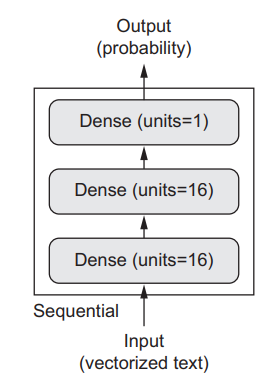

In [24]:
|from keras import models
from keras import layers

In [25]:
x_train[0].shape

(10000,)

In [42]:
model = models.Sequential()
input_dimension = x_train[0].shape[0]
model.add(layers.Dense(16, activation='relu', input_shape=(input_dimension,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [39]:
# Add loss function and optimizer
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [40]:
# Validation dataset
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [41]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
47/47 [==============================] - 3s 41ms/step - loss: 0.5112 - accuracy: 0.7988 - val_loss: 0.3563 - val_accuracy: 0.8730
Epoch 2/20
47/47 [==============================] - 1s 29ms/step - loss: 0.2923 - accuracy: 0.8960 - val_loss: 0.2660 - val_accuracy: 0.8930
Epoch 3/20
47/47 [==============================] - 1s 29ms/step - loss: 0.2210 - accuracy: 0.9184 - val_loss: 0.2466 - val_accuracy: 0.8950
Epoch 4/20
47/47 [==============================] - 1s 29ms/step - loss: 0.1844 - accuracy: 0.9335 - val_loss: 0.2478 - val_accuracy: 0.8930
Epoch 5/20
47/47 [==============================] - 1s 29ms/step - loss: 0.1613 - accuracy: 0.9426 - val_loss: 0.2709 - val_accuracy: 0.8950
Epoch 6/20
47/47 [==============================] - 1s 31ms/step - loss: 0.1404 - accuracy: 0.9505 - val_loss: 0.2806 - val_accuracy: 0.8830
Epoch 7/20
47/47 [==============================] - 2s 33ms/step - loss: 0.1272 - accuracy: 0.9548 - val_loss: 0.2940 - val_accuracy: 0.8880
Epoch 8/20
47

**Plot the training and validation loss**

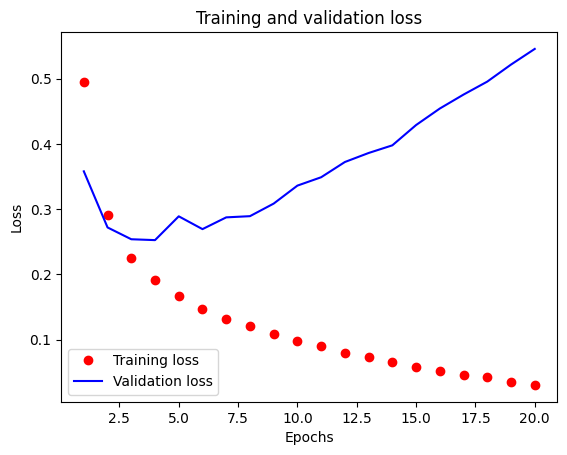

In [35]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'ro', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

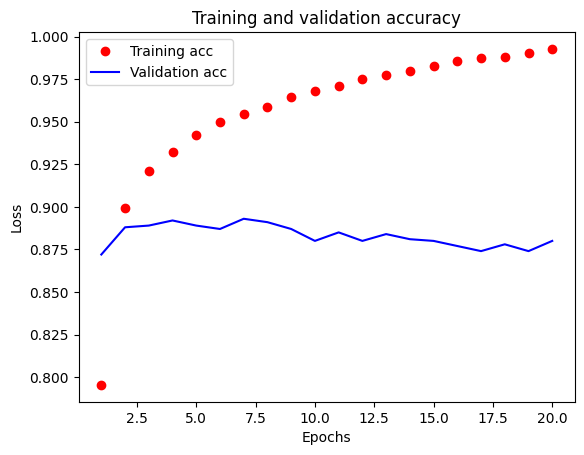

In [36]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'ro', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

As you can see, the training loss decreases with every epoch, and the training accuracy
increases with every epoch. That’s what you would expect when running gradientdescent optimization—the quantity you’re trying to minimize should be less with
every iteration. But that isn’t the case for the validation loss and accuracy: they seem to
peak at the fourth epoch. This is an example of what we warned against earlier: a
model that performs better on the training data isn’t necessarily a model that will do
better on data it has never seen before. In precise terms, what you’re seeing is *overfitting*: after the second epoch, you’re overoptimizing on the training data, and you end
up learning representations that are specific to the training data and don’t generalize
to data outside of the training set.

**Use the trained network for predictions**

In [37]:
model.predict(x_test)

782/782 [==============================] - 3s 3ms/step


array([[0.01690185],
       [1.        ],
       [0.7332902 ],
       ...,
       [0.017007  ],
       [0.00585087],
       [0.81601566]], dtype=float32)

**Summary**

1. You usually need to do quite a bit of preprocessing on your raw data in order to
be able to feed it—as tensors—into a neural network. Sequences of words can
be encoded as binary vectors, but there are other encoding options, too.
2. Stacks of Dense layers with *relu* activations can solve a wide range of problems
(including sentiment classification), and you’ll likely use them frequently.
3. In a binary classification problem (two output classes), your network should
end with a Dense layer with one unit and a *sigmoid* activation: the output of
your network should be a scalar between 0 and 1, encoding a probability.
4. With such a scalar *sigmoid* output on a binary classification problem, the loss
function you should use is *binary_crossentropy*.
5. The *rmsprop* optimizer is generally a good enough choice, whatever your problem. That’s one less thing for you to worry about.
6. As they get better on their training data, neural networks eventually start overfitting and end up obtaining increasingly worse results on data they’ve never
seen before. Be sure to always monitor performance on data that is outside of
the training set.